Optimal solution (board positions): [4, 6, 3, 0, 2, 7, 5, 1]


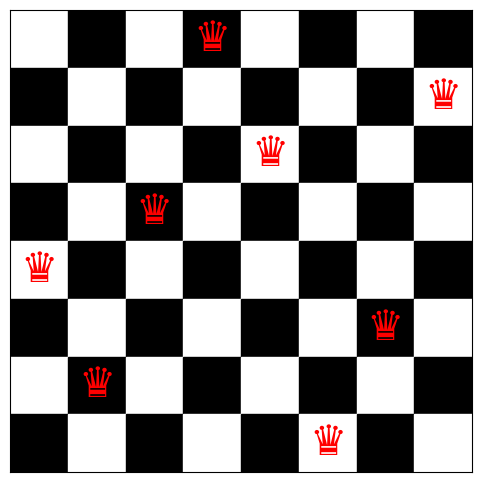

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np

class EightQueensProblem:
    def __init__(self):
        self.size = 8  # 8x8 chessboard

    def initial_state(self):
        return [random.randint(0, self.size - 1) for _ in range(self.size)]

    def get_neighbors(self, state):
        neighbors = []
        for col in range(self.size):
            for row in range(self.size):
                if state[col] != row:
                    neighbor = state[:]
                    neighbor[col] = row
                    neighbors.append(neighbor)
        return neighbors

    def evaluate(self, state):
        conflicts = 0
        for i in range(self.size):
            for j in range(i + 1, self.size):
                if state[i] == state[j] or abs(state[i] - state[j]) == abs(i - j):
                    conflicts += 1
        return -conflicts  # Minimize conflicts

def hill_climbing(problem, max_restarts=100):
    for _ in range(max_restarts):
        current = problem.initial_state()
        while True:
            neighbors = problem.get_neighbors(current)
            if not neighbors:
                break
            next_state = max(neighbors, key=problem.evaluate)
            if problem.evaluate(next_state) <= problem.evaluate(current):
                break
            current = next_state
        if problem.evaluate(current) == 0:
            return current  # Found a solution with zero conflicts
    return None  # No valid solution found after max_restarts

def visualize_board(state):
    """ Display an 8x8 chessboard with properly aligned queens (♛) """
    size = len(state)
    fig, ax = plt.subplots(figsize=(6, 6))
    
    # Draw the chessboard squares correctly
    for row in range(size):
        for col in range(size):
            color = "white" if (row + col) % 2 == 0 else "black"
            ax.add_patch(plt.Rectangle((col, row), 1, 1, color=color))

    # Place queens (♛) correctly centered
    for col, row in enumerate(state):
        ax.text(col + 0.5, row + 0.5, '♛', fontsize=30, ha='center', va='center', color='red')

    # Adjust the board to display correctly
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim(0, size)
    ax.set_ylim(0, size)
    ax.set_aspect('equal')

    plt.gca().invert_yaxis()  # Fix top-left origin like a real chessboard
    plt.show()

if __name__ == "__main__":
    problem = EightQueensProblem()
    solution = hill_climbing(problem)
    if solution:
        print("Optimal solution (board positions):", solution)
        visualize_board(solution)
    else:
        print("No solution found after maximum restarts.")
